In [ ]:
'''
实现中的问题：
１．　y=w*x+b可转成y=w*x 即y=w0+w1x+w2x+...+wnx
    所以这里，要对ｘ样本做处理，相当于多一个特征
    [1.0,*z]
２．　注意ｌｒ的梯度计算公式：w=w-lr*(f(x)-y)*x_T
    这里计算时，要注意维度匹配，每个样本ｘ是一维数组，１Ｄ-array,所以要转置成3*1，就要先把它变成２维
    
３．　这里收敛的判断是根据最大ｅｐｏｃｈｅｓ，也可以选择一个梯度阈值，小于某个数值，即停止。
４．　这里最终test acc没有达到１．０。
５．　sklearn中的ｌｒ可以选择优化方法solver=拟牛顿法，随机梯度下降等
'''


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from collections import Counter
import math


In [3]:

#load data与感知机所用相同
data=load_iris()
# print(data)
df=pd.DataFrame(data.data,columns=data.feature_names)
df['label']=data.target
df.columns=['sl','sw','pl','pw','label']

# X,y
X=np.array(df.iloc[:100,[0,1]])
y=np.array(df.iloc[:100,-1])

# y=np.array([-1 if i==0 else 1 for i in y  ])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)


In [4]:
class LogisticRegression():
    def __init__(self,max_iter=200,lr=0.01):
        self.max_iter=max_iter
        self.lr=lr
        
    
    
    def _sigmoid(self,z):
        # print(z)
        return 1/(1+math.exp(-z))
    
    def _data_matrix(self,x):
        dmat=[]
        for i in x:
            dmat.append([1.0,*i])
            # print(*i)
        return dmat
    
    def fit(self,X_train,y_train):
        X_train=self._data_matrix(X_train)
        self.w=np.zeros((len(X_train[0]),1),dtype=np.float32)
        for e in range(self.max_iter):
            for i in range(len(X_train)):
                self.w-=self.lr*(self._sigmoid(np.dot(X_train[i],self.w))-float(y_train[i]))*\
                np.transpose([X_train[i]])
        print('logistic regression train at lr {}'.format(self.lr))
                
    def score(self,X_test,y_test):
        
        X_test=self._data_matrix(X_test)
        acc=0
        for i in range(len(X_test)):
            # print(np.dot(X_test[i],self.w))
            if np.dot(X_test[i],self.w)>0 and y_test[i]==1 or (np.dot(X_test[i],self.w)<0 and y_test[i]==0):
                acc+=1
            # if self._sigmoid(np.dot(X_test[i],self.w))>0.5 and y_test[i]==1\
            #     or (self._sigmoid(np.dot(X_test[i],self.w))<=0.5 and y_test[i]==0):
            #     acc+=1
        # print(acc)
        acc=acc/len(X_test)
        return acc
            
    def predict(self,xp):
        xp=self._data_matrix(xp)
        if self._sigmoid(np.dot(xp,self.w))>0.5:
            return 1
        else:
            return 0


In [5]:

lr=LogisticRegression()
lr.fit(X_train,y_train)
print(lr.w)
acc=lr.score(X_test,y_test)
print(acc)


logistic regression train at lr 0.01
[[-0.9925121]
 [ 3.408333 ]
 [-5.6968565]]
1.0


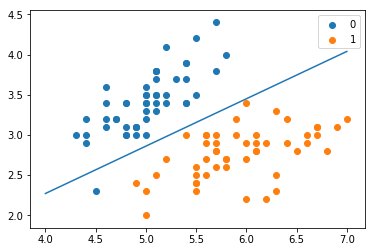

In [14]:
x_ponits = np.arange(4, 8)
y_ = -(lr.w[1]*x_ponits + lr.w[0])/lr.w[2]
plt.plot(x_ponits, y_)

#lr_clf.show_graph()
plt.scatter(X[:50,0],X[:50,1], label='0')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()


In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=200)
lr.fit(X_train,y_train)
acc=lr.score(X_test,y_test)
print(acc)

0.9666666666666667
